# Customer Churn Rate Project
***

Identify the pattern of the user that results in chrun. We want to indetify features that the customer will find more useful and increase the product engagment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import feather

In [4]:
df = pd.read_csv('data/churn_data.csv')
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
df.shape

(27000, 31)

In [6]:
df.columns.values

array(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user',
       'app_web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'], dtype=object)

In [7]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [8]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
df=df[pd.notnull(df['age'])]
df = df.drop(columns=['credit_score','rewards_earned'])

## Histograms Numerical Features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

In [11]:
df_eda = df.drop(columns=['user','churn','housing', 'payment_type','zodiac_sign'])

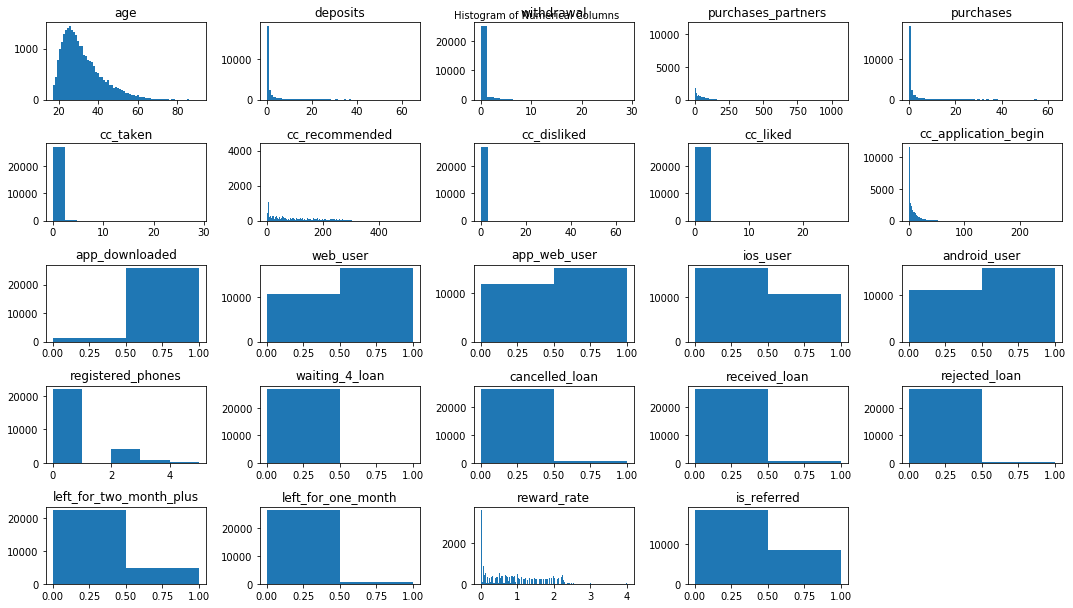

In [12]:
fig =plt.figure(figsize=(15,10))
plt.suptitle('Histogram of Numerical Columns', fontsize = 10)
for i in range(len(df_eda.columns)):
    plt.subplot(6,5,i+1)
    f = plt.gca()
    f.set_title(df_eda.columns[i])
    vals = np.size(df_eda.iloc[:,i].unique())
    #sns.countplot(df_eda.iloc[:,i-1],color="#3F5D7D")
    plt.hist(df_eda.iloc[:,i],bins = vals)
plt.tight_layout()

## Pie Chart of Binary Columns

In [13]:
df_eda =df_eda [['is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan',
                    'left_for_two_month_plus', 'left_for_one_month']]

In [14]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 13 columns):
is_referred                26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones          26996 non-null int64
waiting_4_loan             26996 non-null int64
cancelled_loan             26996 non-null int64
received_loan              26996 non-null int64
rejected_loan              26996 non-null int64
left_for_two_month_plus    26996 non-null int64
left_for_one_month         26996 non-null int64
dtypes: int64(13)
memory usage: 2.9 MB


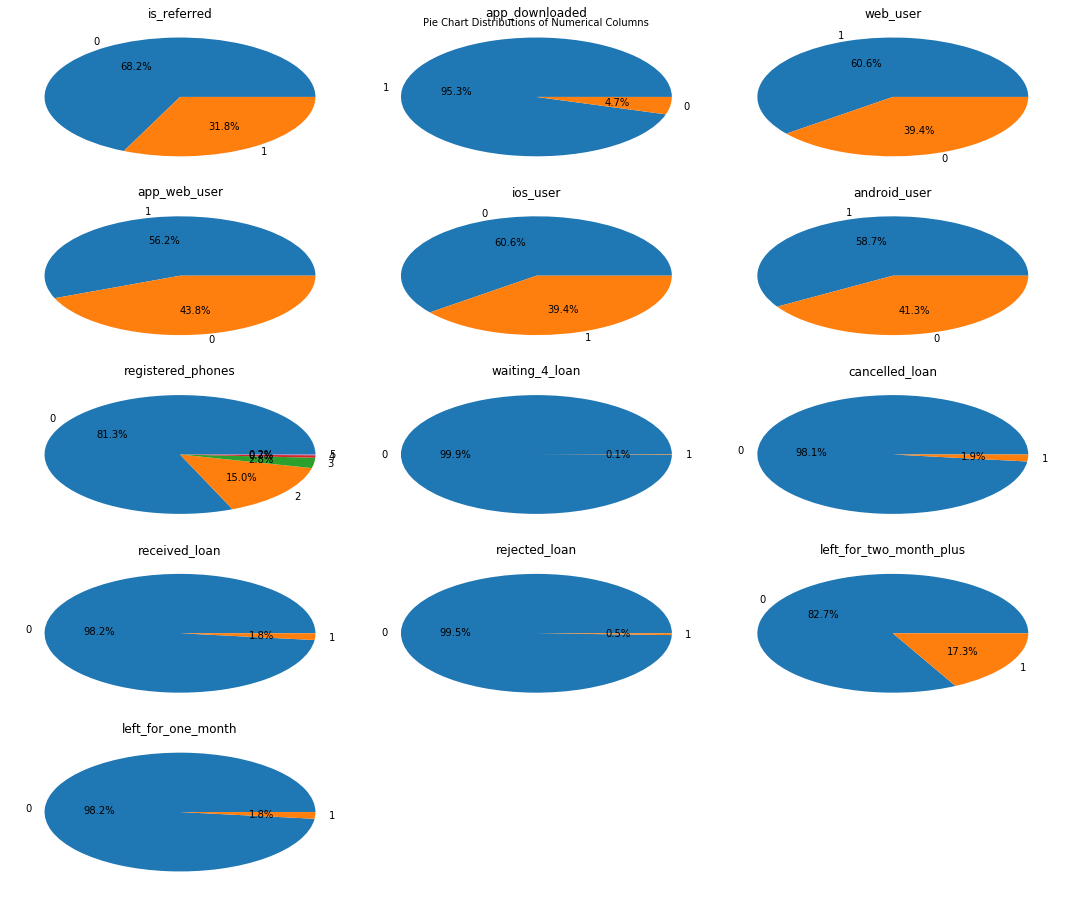

In [15]:
fig =plt.figure(figsize=(15,15))
plt.suptitle('Pie Chart Distributions of Numerical Columns', fontsize = 10)
for i in range(len(df_eda.columns)):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    values = df_eda.iloc[:,i].value_counts(normalize=True).values
    index = df_eda.iloc[:,i].value_counts(normalize=True).index
    f.set_title(df_eda.columns[i])
    plt.pie(values,labels=index,autopct='%1.1f%%')
plt.tight_layout()

In [16]:
df[df_eda.waiting_4_loan ==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
df[df_eda.cancelled_loan ==1].churn.value_counts()


1    274
0    234
Name: churn, dtype: int64

In [18]:
df[df_eda.rejected_loan ==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [19]:
df[df_eda.left_for_one_month ==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

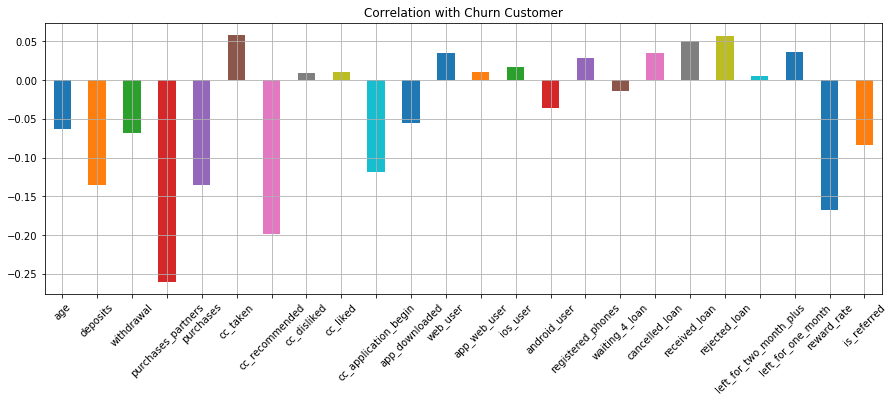

In [22]:
df_corr = df.drop(columns=['user','churn','housing','payment_type','zodiac_sign'])
df_corr.corrwith(df.churn).plot.bar(figsize=(15,5), title='Correlation with Churn Customer',rot=45,grid=True)

# Correlation Matrix

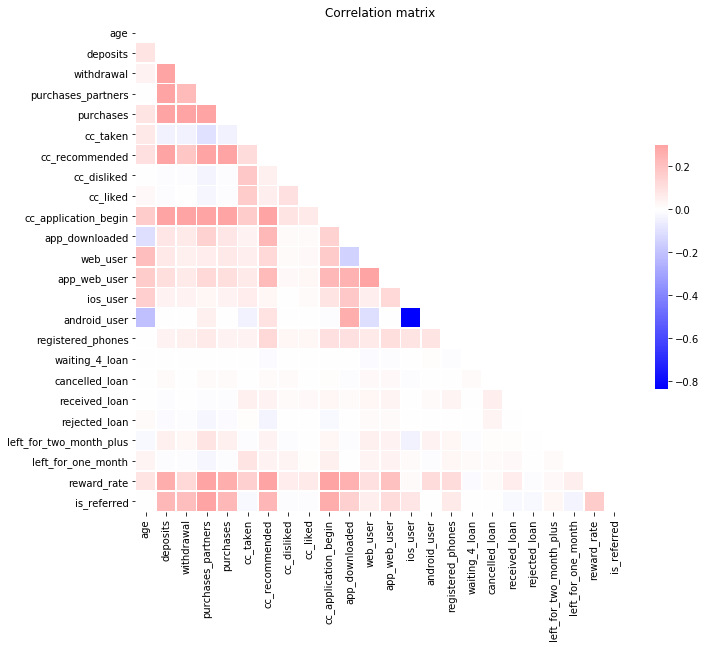

In [23]:
# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation matrix')

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='bwr', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.drop(columns=['app_web_user'],inplace = True)

In [27]:
os.makedirs('tmp',exist_ok=True)
#df.to_feather('tmp/df_clean')
df.to_csv('tmp/df_clean.csv',index=False)